In [1]:
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_rows', 500)

In [2]:
import json 
import numpy as np
import copy
import os
import pickle
import matplotlib.pyplot as plt
from PIL import Image

# Get all the matches between classes and colors 

In [3]:
def get_color_classes():
    """
    Retourne un tableau de couleurs représentant chaque classe.

    Returns:
        np.array: Tableau de couleurs sous forme de valeurs RGB pour chaque classe.
    """
    colors = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [111, 74, 0], [81, 0, 81], [128, 64, 128], [244, 35, 232], [250, 170, 160], [230, 150, 140], [70, 70, 70], [102, 102, 156], [190, 153, 153], [180, 165, 180], [150, 100, 100], [150, 120, 90], [153, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0], [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60], [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100], [0, 0, 90], [0, 0, 110], [0, 80, 100], [0, 0, 230], [119, 11, 32], [0, 0, 142]] 
    return   np.array(colors)
colors = get_color_classes()

In [4]:
def show_classes_with_colors():
    """
    Affiche une grille des classes et de leurs couleurs correspondantes.

    Args:
        None

    Returns:
        None: La fonction affiche directement les classes et leurs couleurs sous forme de grille.
    """
    cols=9
    rows=4
    colors = get_color_classes()
    fig, ax = plt.subplots(rows, cols, figsize=(20, 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    labels=["unlabeled",'ego vehicle', 'rectification border', 'out of roi' , 'static' , 'dynamic'  , 'ground' ,  'road', 'sidewalk',
    'parking', 'rail track' , 'building', 'wall' ,  'fence'       , 'guard rail',  'bridge', 'tunnel' , 'pole', 'polegroup', 
    'traffic light',  'traffic sign' , 'vegetation', 'terrain' , 'sky', 'person'  , 'rider',  'car', 'truck', 'bus' ,  'caravan', 'trailer', 'train', 'motorcycle',
    'bicycle'  , 'license plate']
    for i, color in enumerate(colors):
        
        row = i // cols
        col = i % cols
        ax[row, col].imshow([[(color[0], color[1],color[2])]], extent=[0, 1, 0, 1], origin='lower', aspect='auto')
        ax[row, col].set_title(f' {i}-{labels[i]}')
        ax[row, col].axis('off')

    plt.suptitle('Classes and colors', fontsize=16)
    plt.show()

In [5]:
def matcher_fusion(matcher_in, matcher_out):
    matcher = {k: v for k, v in matcher_in.items() if v <= 23}
    matcher.update({k: v for k, v in matcher_out.items() if v > 23 and k not in matcher})
    return matcher

In [20]:
def plot_evolution_In_out_vocab(path_folder_results, all_classes=False):
    """
    Trace l'évolution des métriques PQ pour les classes "All", "Things", et "Stuff", ainsi que pour les vocabulaires "In" et "Out".

    Args:
        path_folder_results (str): Chemin vers le dossier contenant les résultats.
        all_classes (bool): Si True, trace l'évolution pour chaque classe individuelle. Par défaut False.

    Returns:
        None: La fonction affiche directement les graphiques.
    """

    with open(os.path.join(path_folder_results,'log.txt'), 'r') as file:
        # Read the entire contents of the file
        plots_results = file.read()
    lis_plot=plots_results.split("|        |   PQ   |   SQ   |   RQ   |  #categories  |")
    test_INvocab=False
    if test_INvocab:
         with open(os.path.join("/tsi/hi-paris/FCCLIP_results/Results_with_images/Inference/inferece_results/fcclip_cocopan_r50_000_000",'log.txt'), 'r') as file:
            # Read the entire contents of the file
            inferences_logs = file.read()
         list_nferences_logs=inferences_logs.split("|        |   PQ   |   SQ   |   RQ   |  #categories  |") 
         out_vocab_inference=[float(i.split('|')[2]) for i in list_nferences_logs[1].split("\n")[8:27][-8:]]
         test_INvocab=True



    in_vocab_all=[]
    out_vocab_all=[]

    all=[]
    Things=[]
    Stuff=[]

    for m in range(1,len(lis_plot)):
        results_run=lis_plot[m].split("\n")
        results_val=[]


        all.append(float(results_run[2].split("|")[2])) 
        Things.append(float(results_run[3].split("|")[2])) 
        Stuff.append(float(results_run[4].split("|")[2])) 

        
        for i in results_run[8:27]:
            list_val=i.split("|")
            results_val.append(float(list_val[2]))
        
        in_vocab=results_val[:-8]
        out_vocab=results_val[-8:]
        if not all_classes:
            in_vocab_all.append(sum(in_vocab)/len(in_vocab))
            if test_INvocab:
                out_vocab_all.append(sum(out_vocab_inference)/len(out_vocab_inference)) 
            else:
                out_vocab_all.append(sum(out_vocab)/len(out_vocab))
        else:
            in_vocab_all.append(in_vocab)
            if test_INvocab:
                out_vocab_all.append(out_vocab_inference) 
            else:
                out_vocab_all.append(out_vocab)
    plt.figure(figsize=(10, 5))
    if test_INvocab:
         print(out_vocab_inference)
         print(Stuff)
         out_ll=sum(out_vocab_inference)/8

         all = [(i*11 + out_ll*8)/19 for i in Stuff] 
         Things=[out_ll for i in range(len(Stuff))]
    x_=range(0, 1000, 10)
    plt.plot(x_,all, marker='o', linestyle='-', color='r', label="all")
    plt.plot(x_,Things, marker='o', linestyle='-', color='b', label="Things")
    plt.plot(x_,Stuff, marker='o', linestyle='-', color='g', label="Stuff")
    plt.title('PQ evolution for All, Things and Stuff')
    plt.xlabel('Iter')
    plt.ylabel('PQ')
    plt.grid(True)
    plt.legend() 
    plt.show()
    if not all_classes:
        plt.figure(figsize=(10, 5))
        plt.plot(x_,in_vocab_all, marker='o', linestyle='-', color='r', label="IN vocab")
        plt.plot(x_,out_vocab_all, marker='x', linestyle='-', color='b', label="OUT vocab")
        plt.title('PQ evolution for In and Out vocab')
        plt.xlabel('Iter')
        plt.ylabel('PQ')
        plt.grid(True)
        plt.legend()
        plt.show()
    else:
        out_vocab_all=np.array(out_vocab_all).T
        in_vocab_all=np.array(in_vocab_all).T
        classes=[7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33]
        colors=get_color_classes()
        plt.figure(figsize=(15, 10))
        for k in range(len(in_vocab_all)):
                plt.plot(x_,in_vocab_all[k], marker='o', linestyle='-', label=f"IN vocab classe {classes[k]}", color=tuple(c / 255.0 for c in colors[k])  )
        for k in range(len(out_vocab_all)):
                plt.plot(x_,out_vocab_all[k], marker='x', linestyle='-', label=f"OUT vocab classe {classes[k+len(in_vocab_all)]}")
        plt.title('PQ evolution for each classe')
        plt.xlabel('Iter')
        plt.ylabel('PQ')
        plt.grid(True)
        plt.legend()
        plt.show()


In [9]:
classes=[7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33]
len(classes)

19

In [10]:
def update_image(image, colors, value_dict):
    """
    Met à jour une image prédite avec les couleurs correspondantes aux vraies classes.

    Args:
        image (list): Image prédite représentée sous forme de liste 3D où chaque élément est une sous-liste contenant des labels de sortie.
        colors (dict): Dictionnaire associant chaque classe à une couleur (sous forme de liste de 3 valeurs [R, G, B]).
        value_dict (dict): Dictionnaire de correspondance entre les labels de sortie et les vrais labels.

    Returns:
        list: Nouvelle image avec les couleurs mises à jour en fonction des vraies classes.
    """
    new_image= [[[value_dict[sublist[0]] if sublist[0] in value_dict else 0 , 0,0] for sublist in subarray] for subarray in image]
    for i in new_image:
        for j in i:
            lab=j[0]
            for k in range(3):
                j[k]=colors[lab][k]

    return new_image

def get_matcher(data_for_matcher, index):
    """
    Crée un dictionnaire de correspondance entre les vrais labels et les labels de sortie.

    Args:
        data_for_matcher (dict): Dictionnaire contenant le nombre d'intersections entre les classes.
        index (int): Index spécifiant la clé dans data_for_matcher à utiliser pour obtenir les données d'intersection.

    Returns:
        dict: Dictionnaire de correspondance entre les labels de sortie (clés) et les vrais labels (valeurs).
    """
    max_per_y = {}
    matcher={}
    data_=data_for_matcher[index] 
    for (x, y), value in data_.items():
        if y not in max_per_y or value > max_per_y[y][1]:
            max_per_y[y] = (x, value)
            if len(str(x))>3:
                matcher[int(y)]=int(str(x)[:2])
            else:
                matcher[int(y)]=int(x)
    return matcher

In [11]:
def get_all_names_of_images(path_folder_results):
    """
    Affiche tous les noms d'images présents dans un dossier spécifique.

    Args:
        path_folder_results (str): Chemin du dossier contenant les résultats.

    Returns:
        None: Cette fonction affiche directement les noms des fichiers d'image.
    """
    path_images=os.path.join(path_folder_results,'images/image_iter_0')
    for  i in os.listdir(path_images):
        print(i)

In [12]:
def plot_with_name_image(path_results,name_image,iteration, type='infer'):
    """
    Affiche les images originales, prédites, sémantiques et panoptiques pour une itération donnée.

    Args:
        path_results (str): Chemin vers le dossier de résultats.
        name_image (str): Nom de l'image à traiter.
        iteration (int): Numéro de l'itération.
        type (str): Type d'affichage (par défaut 'infer').

    Returns:
        None: La fonction affiche directement les images.
    """


    plt.figure(figsize=(15, 9))
    ind_image=0
    with open("/tsi/hi-paris//cityscapes/gtFine/cityscapes_panoptic_val.json", 'r') as file:
        data = json.load(file) 
    ind_sementic=-1
    for i in range(len(data["annotations"])): 
        if data["annotations"][i]["image_id"] in name_image: 
            ind_sementic=i 
    

    
    
    path_found_matcher=os.path.join(path_results,'all', 'all'+str(iteration))
    with open(path_found_matcher, 'rb') as file:
        matcher_pickle=pickle.load(file)

    matcher=get_matcher(matcher_pickle, ind_sementic)
    Naive=True
    if Naive:
        path_inference="/tsi/hi-paris/FCCLIP_results/Results_with_images/Inference/inferece_results/fcclip_cocopan_r50_000_000"
        path_found_matcher_out=os.path.join(path_inference,'all', 'all0')
        with open(path_found_matcher_out, 'rb') as file:
            matcher_pickle_out=pickle.load(file)
        matcher_out=get_matcher(matcher_pickle_out, ind_sementic)
        matcher=  matcher_fusion(matcher,matcher_out)
    

 
    path_images=os.path.join(path_results, "images", "image_iter_"+str(iteration)) 
    image = np.array(Image.open(os.path.join(path_images, name_image))  , dtype=np.uint32)
    
    predicted_image=update_image(image, colors, matcher) 


    list_name_=name_image.split('_')
    gtFine_color_image=Image.open(os.path.join("/tsi/hi-paris/cityscapes/gtFine/val/", name_image.split('_')[0],list_name_[0]+'_'+list_name_[1]+"_"+list_name_[2]+'_gtFine_color.png'))
    
    panoptic_image_path=os.path.join("/tsi/hi-paris/cityscapes/gtFine/","cityscapes_panoptic_val",list_name_[0]+'_'+list_name_[1]+"_"+list_name_[2]+'_gtFine_panoptic.png')#list_name_[0]+'_'+list_name_[1]+"_"+list_name_[2]+'_gtFine_panoptic.png')
    panoptic_image = Image.open(panoptic_image_path) 
    
    original_image = Image.open(os.path.join("/tsi/hi-paris/cityscapes//leftImg8bit/val/", name_image.split("_")[0],name_image))
    
    plt.subplot(3, 2, ind_image + 1)   
    plt.imshow(predicted_image )
    plt.title("Predicted image")
    plt.axis('off') 
    plt.subplot(3, 2, ind_image + 2)   
    plt.imshow(original_image)
    plt.axis('off')
    plt.title("aoriginal image")  
    plt.subplot(3, 2,  ind_image+ 3)   
    plt.imshow(gtFine_color_image )
    plt.axis('off')  
    plt.title("leftImg8bit image")   
    plt.subplot(3, 2, ind_image + 4)  
    plt.imshow(panoptic_image)
    plt.title("Panoptic image")  
    plt.axis('off')  
    plt.tight_layout()   
    plt.show() 

In [13]:
path_folder_results="/tsi/hi-paris/FCCLIP_results/Results_with_images/Full_finetuning/train_results/fcclip_cocopan_r50_000_100"
#path_folder_results="//tsi/hi-paris/FCCLIP_results/Results_with_images/INvocab/train_results/fcclip_cocopan_r50_008_100"
get_all_names_of_images(path_folder_results)

munster_000142_000019_leftImg8bit.png
munster_000039_000019_leftImg8bit.png
frankfurt_000001_052120_leftImg8bit.png
munster_000066_000019_leftImg8bit.png
munster_000166_000019_leftImg8bit.png
frankfurt_000001_023235_leftImg8bit.png
munster_000016_000019_leftImg8bit.png
frankfurt_000001_058914_leftImg8bit.png
frankfurt_000001_073464_leftImg8bit.png
frankfurt_000001_029086_leftImg8bit.png
munster_000081_000019_leftImg8bit.png
frankfurt_000001_051516_leftImg8bit.png
munster_000156_000019_leftImg8bit.png
munster_000113_000019_leftImg8bit.png
frankfurt_000001_049078_leftImg8bit.png
munster_000036_000019_leftImg8bit.png
munster_000042_000019_leftImg8bit.png
munster_000104_000019_leftImg8bit.png
lindau_000027_000019_leftImg8bit.png
lindau_000045_000019_leftImg8bit.png
munster_000150_000019_leftImg8bit.png
munster_000049_000019_leftImg8bit.png
frankfurt_000001_075296_leftImg8bit.png
frankfurt_000001_066438_leftImg8bit.png
munster_000031_000019_leftImg8bit.png
frankfurt_000001_078803_leftImg8bi

In [12]:
#path_folder_results_full_finetuning="/tsi/hi-paris/FCCLIP_results/Results_with_images/Full_finetuning/train_results/fcclip_cocopan_r50_000_100"
#path_folder_results_INvocab="/tsi/hi-paris/FCCLIP_results/Results_with_images/INvocab/train_results/fcclip_cocopan_r50_008_100"
#path_folder_results_Naive="/tsi/hi-paris/FCCLIP_results/Results_with_images/Naive/train_results/fcclip_cocopan_r50_008_100"
#plot_with_name_image(path_folder_results_Naive,"frankfurt_000001_075296_leftImg8bit.png",1, type='infer')

In [14]:
path_folder_results="/tsi/hi-paris/FCCLIP_results/All_results/INvocab/fcclip_cocopan_r50_1000_008_10iter"
name_image="munster_000150_000019_leftImg8bit.png"

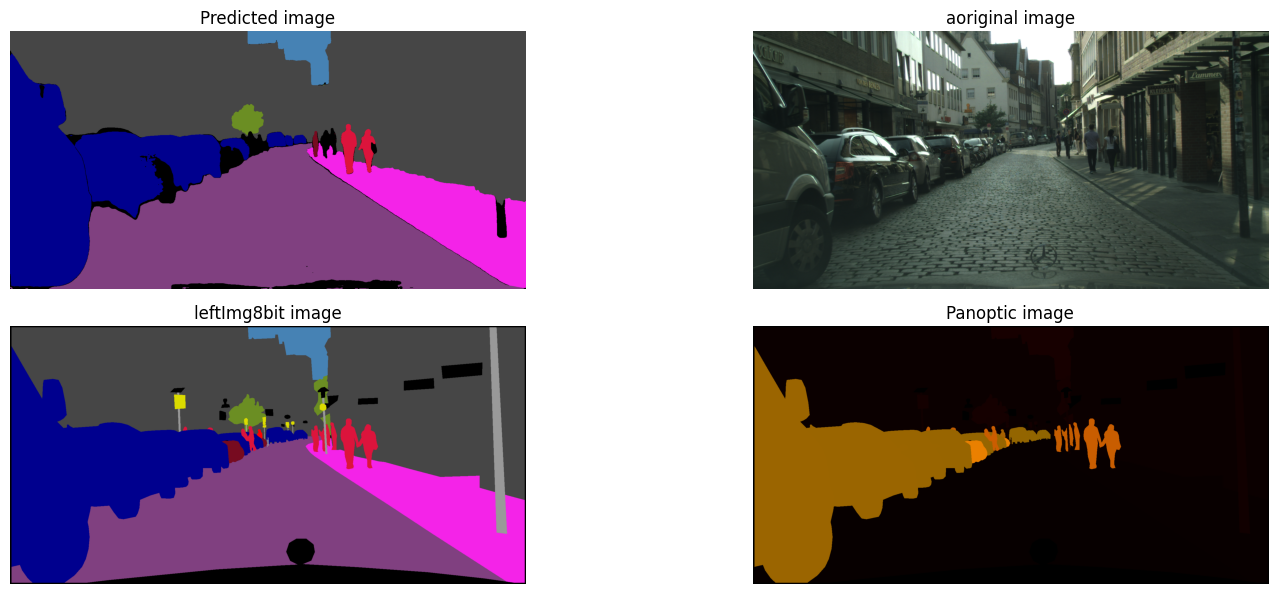

In [14]:
plot_with_name_image(path_folder_results,name_image,0, type='infer')

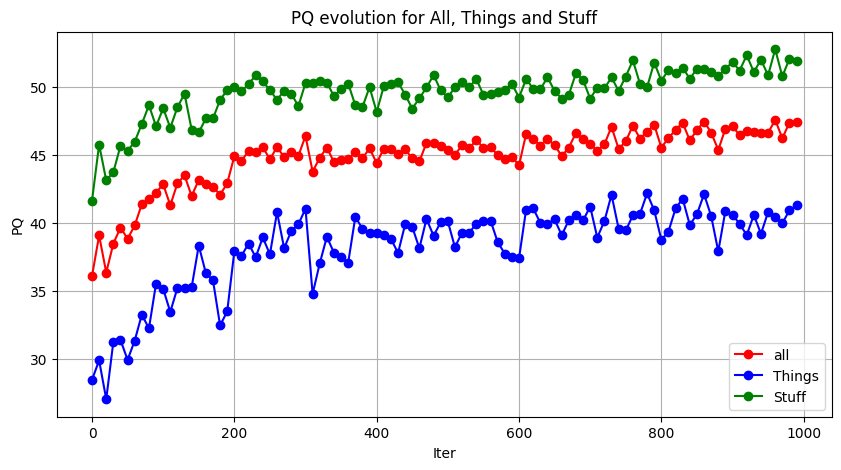

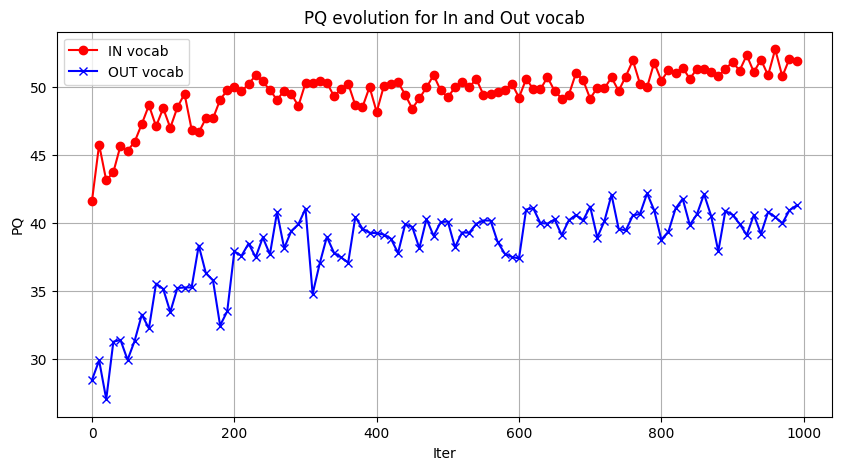

In [21]:
plot_evolution_In_out_vocab(path_folder_results, all_classes=False)

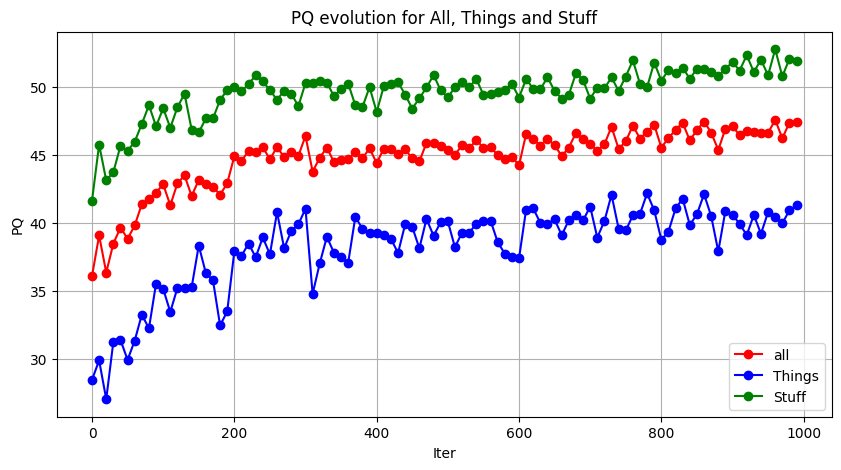

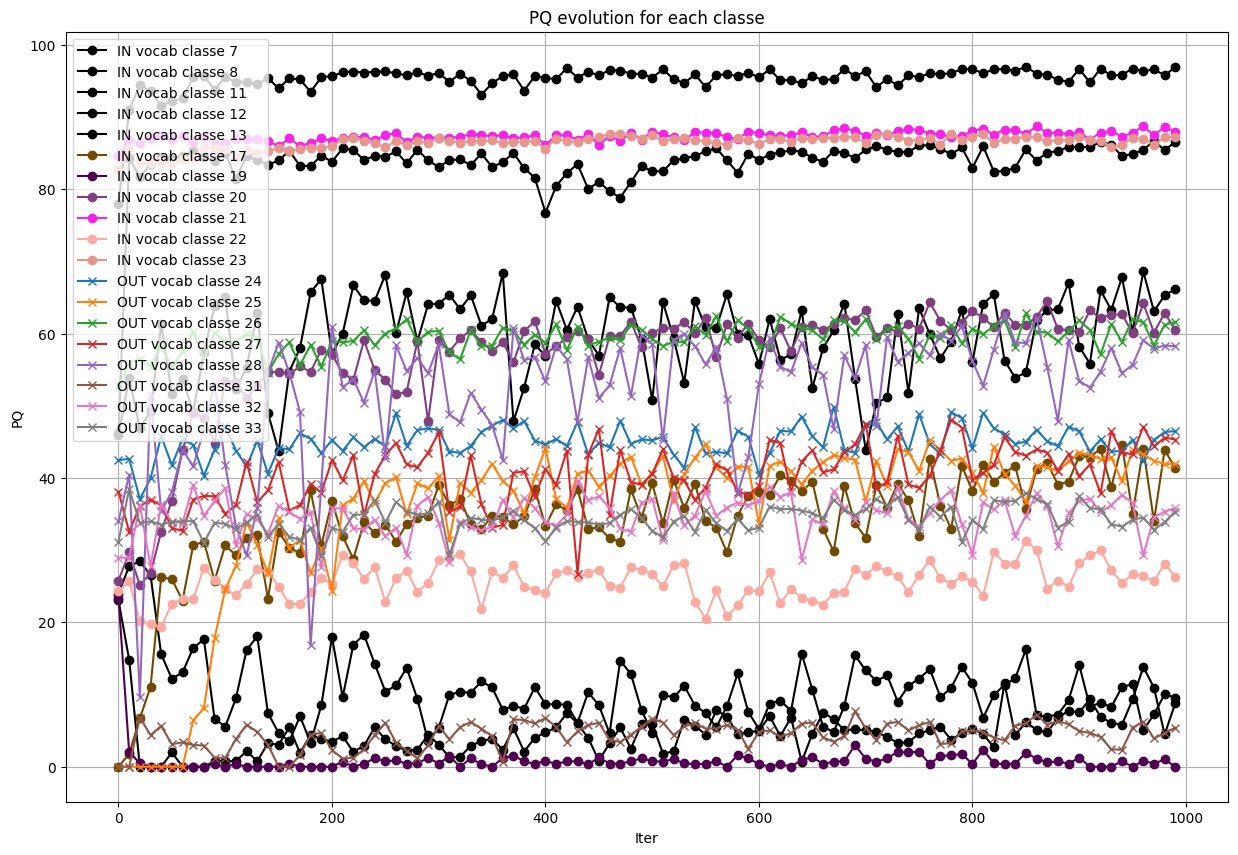

In [22]:
plot_evolution_In_out_vocab(path_folder_results, all_classes=True)

In [23]:
colors = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [111, 74, 0], [81, 0, 81], [128, 64, 128], [244, 35, 232], [250, 170, 160], [230, 150, 140], [70, 70, 70], [102, 102, 156], [190, 153, 153], [180, 165, 180], [150, 100, 100], [150, 120, 90], [153, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0], [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60], [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100], [0, 0, 90], [0, 0, 110], [0, 80, 100], [0, 0, 230], [119, 11, 32], [0, 0, 142]] 
len(colors)

35

# Traitement des Soft labels

In [24]:
import numpy as np
from PIL import Image
from scipy.optimize import linear_sum_assignment

def pq_compute(pred, gt):
    """
    Compute Panoptic Quality (PQ) for given predicted and ground truth segmentation masks.

    Parameters
    ----------
    pred : ndarray
        The predicted segmentation mask as a 2D array.
    gt : ndarray
        The ground truth segmentation mask as a 2D array.

    Returns
    -------
    pq : float
        The Panoptic Quality score.
    tp : int
        The number of True Positives.
    fp : int
        The number of False Positives.
    fn : int
        The number of False Negatives.

    Notes
    -----
    The function ignores background labeled as 0 in both predicted and ground truth masks.
    """
    # Step 1: Identify unique segments in both prediction and ground truth
    pred_labels = np.unique(pred)
    gt_labels = np.unique(gt)

    # Ignore the background if labeled as 0
    pred_labels = pred_labels[pred_labels != 0]
    gt_labels = gt_labels[gt_labels != 0]

    # Step 2: Create the IoU matrix
    iou_matrix = np.zeros((len(gt_labels), len(pred_labels)))

    for i, gt_label in enumerate(gt_labels):
        gt_mask = (gt == gt_label)
        for j, pred_label in enumerate(pred_labels):
            pred_mask = (pred == pred_label)
            intersection = np.logical_and(gt_mask, pred_mask).sum()
            union = np.logical_or(gt_mask, pred_mask).sum()
            iou_matrix[i, j] = intersection / union if union > 0 else 0

    # Step 3: Solve the assignment problem
    row_ind, col_ind = linear_sum_assignment(-iou_matrix)

    # Step 4: Calculate PQ components
    tp = len(row_ind)  # True positives
    fp = len(pred_labels) - tp  # False positives
    fn = len(gt_labels) - tp  # False negatives

    iou_sum = iou_matrix[row_ind, col_ind].sum()
    pq = iou_sum / (tp + 0.5 * fp + 0.5 * fn) if tp > 0 else 0

    return pq, tp, fp, fn



In [25]:
def get_matchin_labels_true_images(path_results, name_image, iteration):
    colors = [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [111, 74, 0], [81, 0, 81], [128, 64, 128], [244, 35, 232], [250, 170, 160], [230, 150, 140], [70, 70, 70], [102, 102, 156], [190, 153, 153], [180, 165, 180], [150, 100, 100], [150, 120, 90], [153, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0], [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60], [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100], [0, 0, 90], [0, 0, 110], [0, 80, 100], [0, 0, 230], [119, 11, 32], [0, 0, 142]] 

    # get the predict image 
    ind_image=0
    with open("/tsi/hi-paris//cityscapes/gtFine/cityscapes_panoptic_val.json", 'r') as file:
        data = json.load(file) 
    ind_sementic=-1
    for i in range(len(data["annotations"])): 
        if data["annotations"][i]["image_id"] in name_image: 
            ind_sementic=i  
    path_found_matcher=os.path.join(path_results,'all', 'all'+str(iteration))
    with open(path_found_matcher, 'rb') as file:
        matcher_pickle=pickle.load(file) 
    matcher=get_matcher(matcher_pickle, ind_sementic)
    Naive=False
    if Naive:
        path_inference="/tsi/hi-paris/FCCLIP_results/Results_with_images/Inference/inferece_results/fcclip_cocopan_r50_000_000"
        path_found_matcher_out=os.path.join(path_inference,'all', 'all0')
        with open(path_found_matcher_out, 'rb') as file:
            matcher_pickle_out=pickle.load(file)
        matcher_out=get_matcher(matcher_pickle_out, ind_sementic)
        matcher=  matcher_fusion(matcher,matcher_out)
    

 
    path_images=os.path.join(path_results, "images", "image_iter_"+str(iteration)) 
    image = np.array(Image.open(os.path.join(path_images, name_image))  , dtype=np.uint32)
    
    predicted_image=update_image(image, colors, matcher) 


    



    # get the true image
    list_name_=name_image.split('_')
    gtFine_color_image=Image.open(os.path.join("/tsi/hi-paris/cityscapes/gtFine/val/", name_image.split('_')[0],list_name_[0]+'_'+list_name_[1]+"_"+list_name_[2]+'_gtFine_color.png')).convert('RGB')
    
    array_ = np.array(gtFine_color_image)
    height, width, channels = array_.shape
    color_to_id = { tuple(color):idx for idx, color in enumerate(colors)}
    color_to_id[(0,0,0)]=0
    image_array = np.zeros((height, width), dtype=np.uint8)
    for i in range(len(array_)):
        for j in range(len(array_[i])):
            image_array[i][j]=color_to_id[(array_[i][j][0],array_[i][j][1], array_[i][j][2])]
    

    predicted_array = np.zeros((height, width), dtype=np.uint8)
    for i in range(len(predicted_image)):
        for j in range(len(predicted_image[i])):
            predicted_array[i][j]=color_to_id[(predicted_image[i][j][0],predicted_image[i][j][1], predicted_image[i][j][2])]

    return image_array,predicted_array

def calculate_intersection(or_img,predict_img):
    results = {} 
    for i in range(or_img.shape[0]):
        for j in range(or_img.shape[1]):
            value_or_img = or_img[i, j]
            value_predict_img = predict_img[i, j]
            if (value_or_img, value_predict_img) in results:
                results[(value_or_img, value_predict_img)] += 1
            else:
                results[(value_or_img, value_predict_img)] = 1
    return results



In [26]:
def get_soft_labels(setup_name,path_results, name_image, iteration):


    
    with open("/tsi/hi-paris//cityscapes/gtFine/cityscapes_panoptic_val.json", 'r') as file:
        data = json.load(file) 
    ind_sementic=-1
    for i in range(len(data["annotations"])): 
        if data["annotations"][i]["image_id"] in name_image: 
            ind_sementic=i 
    
    labels=["unlabeled",'ego vehicle', 'rectification border', 'out of roi' , 'static' , 'dynamic'  , 'ground' ,  'road', 'sidewalk',
        'parking', 'rail track' , 'building', 'wall' ,  'fence'       , 'guard rail',  'bridge', 'tunnel' , 'pole', 'polegroup', 
        'traffic light',  'traffic sign' , 'vegetation', 'terrain' , 'sky', 'person'  , 'rider',  'car', 'truck', 'bus' ,  'caravan', 'trailer', 'train', 'motorcycle',
        'bicycle'  , 'license plate']
    
    
    path_found_matcher=os.path.join(path_results,'all', 'all'+str(iteration))
    with open(path_found_matcher, 'rb') as file:
        matcher_pickle=pickle.load(file)
    
    data= matcher_pickle[ind_sementic]
    df = pd.DataFrame(list(data.items()), columns=['Coordinates', 'Value_out_pred'])
    df[['Soft_label', 'pred_label']] = pd.DataFrame(df['Coordinates'].tolist(), index=df.index)
    df.drop(columns=['Coordinates'], inplace=True)
    
    sum_per_x = df.groupby('Soft_label')['Value_out_pred'].sum().reset_index() 
    sum_per_x.columns = ['Soft_label', 'Total_Value_per_X']
 
    df = df.merge(sum_per_x, on='Soft_label')
    df['Soft_label'] = df['Soft_label'].astype(int)
    df['pred_label'] = df['pred_label'].astype(int)
 
    df['Percentage'] = (df['Value_out_pred'] / df['Total_Value_per_X']) * 100
    df['Image']=name_image
    df['Epoch']=iteration
    df["Setup"]=setup_name
    df["name_class"]=[labels[i] for i in df['pred_label']]
    df = df[['Setup','Epoch','Image','name_class','Soft_label', 'pred_label', 'Value_out_pred','Total_Value_per_X','Percentage']]
    or_img,predict_img=get_matchin_labels_true_images(path_results, name_image, iteration)
    intersection=calculate_intersection(or_img,predict_img)


    df1 = pd.DataFrame(list(intersection.items()), columns=['Coordinates', 'Value_or_pred'])
    df1[['Or_label', 'pred_label']] = pd.DataFrame(df1['Coordinates'].tolist(), index=df1.index)
    df1.drop(columns=['Coordinates'], inplace=True)

    df_results=pd.merge(df, df1, on='pred_label', how='outer')
    df_results = df_results[['Setup','Epoch','Image','name_class','Soft_label', 'pred_label','Or_label', 'Value_out_pred','Value_or_pred','Total_Value_per_X','Percentage']]


    gt_image_path =    os.path.join("/tsi/hi-paris/cityscapes/gtFine/val/", name_image.split('_')[0],name_image.split('_')[0]+'_'+name_image.split('_')[1]+"_"+name_image.split('_')[2]+'_gtFine_color.png') 

    pred_image_path = os.path.join(path_folder_results, "images", "image_iter_"+str(iteration), name_image)  
    gt_image = np.array(Image.open(gt_image_path))
    pred_image = np.array(Image.open(pred_image_path)) 
    gt_image_gray = np.array(Image.open(gt_image_path).convert('L'))
    pred_image_gray = np.array(Image.open(pred_image_path).convert('L'))

    pq, tp, fp, fn = pq_compute(pred_image_gray, gt_image_gray) 

    df_results["PQ"]=pq
    df_results["TP"]=tp
    df_results["FP"]=fp
    df_results["FN"]=fn
    

    return df_results 


In [27]:
# Load the images


In [29]:
dataset_results=get_soft_labels("Naive", path_folder_results, name_image, 9)

In [30]:
dataset_results.head(5)

,Setup,Epoch,Image,name_class,Soft_label,pred_label,Or_label,Value_out_pred,Value_or_pred,Total_Value_per_X,Percentage,PQ,TP,FP,FN
0,Naive,9.0,munster_000150_000019_leftImg8bit.png,unlabeled,0.0,0,0.0,100139.0,8295.0,134239.0,74.597546,0.358201,9,0,2
1,Naive,9.0,munster_000150_000019_leftImg8bit.png,unlabeled,0.0,0,7.0,100139.0,19.0,134239.0,74.597546,0.358201,9,0,2
2,Naive,9.0,munster_000150_000019_leftImg8bit.png,unlabeled,7.0,0,0.0,65488.0,8295.0,495551.0,13.215189,0.358201,9,0,2
3,Naive,9.0,munster_000150_000019_leftImg8bit.png,unlabeled,7.0,0,7.0,65488.0,19.0,495551.0,13.215189,0.358201,9,0,2
4,Naive,9.0,munster_000150_000019_leftImg8bit.png,unlabeled,8.0,0,0.0,169340.0,8295.0,170929.0,99.070374,0.358201,9,0,2


ajouter les noms des classes, label d'input  
Setup	Epochs	Image	Soft_label		True_lable	Class value	Class name	ks	Value	Total_value_per_x	Percentage

In [ ]:
df

In [109]:
data_matching_soft_label.head(100)

,Setup,Epoch,Image,name_class,Soft_label,True_label,Value,Total_Value_per_X,Percentage
0,Naive,0,munster_000150_000019_leftImg8bit.png,unlabeled,0,0,21702,134239,16.166688
1,Naive,0,munster_000150_000019_leftImg8bit.png,rectification border,0,2,5350,134239,3.985429
2,Naive,0,munster_000150_000019_leftImg8bit.png,out of roi,0,3,22,134239,0.016389
3,Naive,0,munster_000150_000019_leftImg8bit.png,rail track,0,10,1650,134239,1.229151
4,Naive,0,munster_000150_000019_leftImg8bit.png,fence,0,13,1724,134239,1.284277
5,Naive,0,munster_000150_000019_leftImg8bit.png,bridge,0,15,70387,134239,52.434091
6,Naive,0,munster_000150_000019_leftImg8bit.png,tunnel,0,16,33404,134239,24.883976
7,Naive,0,munster_000150_000019_leftImg8bit.png,unlabeled,7,0,3217,495551,0.649176
8,Naive,0,munster_000150_000019_leftImg8bit.png,rectification border,7,2,3242,495551,0.654221
9,Naive,0,munster_000150_000019_leftImg8bit.png,static,7,4,276,495551,0.055696


input [.....] ---- model ---- > [0, 1, 3] ------ match----> predict label [15, 16, 7]

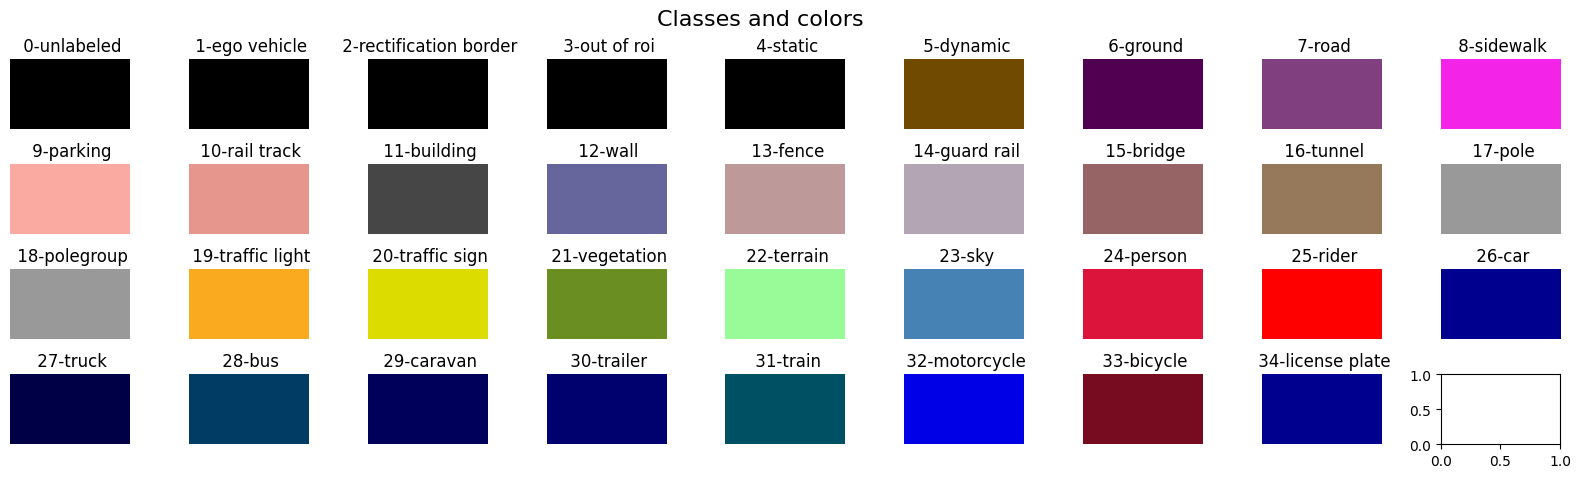

In [27]:
show_classes_with_colors()